# Inaugural Project: Time Use of Couples

We consider a household with a male and a female member. The jointly maximize utility chooosing their time use:

1. Hourse working in the market, $L_M$ and $L_F$, at wages $w_M$ and $w_F$
2. Hours working at home, $H_M$ and $H_F$

The time choice of time implies: 

1. Consumtion of market goods, $C = w_M L_M + w_F L_F $
2. Consumtion of home production,

$$
H= \begin{cases}\min \left\{H_M, H_F\right\} & \text { if } \sigma=0 \\ H_M^{1-\alpha} H_F^\alpha & \text { if } \sigma=1 \\ \left((1-\alpha) H_M^{\frac{\sigma-1}{\sigma}}+\alpha H_F^{\frac{\sigma-1}{\sigma}}\right)^{\frac{\sigma}{\sigma-1}} & \text { else }\end{cases} 
$$

where $\sigma$ is the elasticity of substitution, and $\frac{\alpha}{1-\alpha}$ is the productivity in home production for females relative to males.

3. Total consumtion, $Q = C^{\omega} H^{1-\omega},$ where $\omega$ is the weight on market goods.

The household gets disutility from time spend working. The full maximization problem of
the household is

$$
\begin{aligned}
& \max _{L_M, H_M, L_F, H_F} \frac{Q^{1-\rho}}{1-\rho}-\nu\left(\frac{T_M^{1+\frac{1}{\epsilon}}}{1+\frac{1}{\epsilon}}+\frac{T_F^{1+\frac{1}{\epsilon}}}{1+\frac{1}{\epsilon}}\right), \rho>1, \nu>0, \epsilon>0 \\
& \text { s.t. } \\
& C=w_M L_M+w_F L_F \\
& H= \begin{cases}\min \left\{H_M, H_F\right\} & \text { if } \sigma=0 \\
H_M^{1-\alpha} H_F^\alpha & \text { if } \sigma=1 \\
\left((1-\alpha) H_M^{\frac{\sigma-1}{\sigma}}+\alpha H_F^{\frac{\sigma-1}{\sigma}}\right)^{\frac{\sigma}{\sigma-1}} & \text { else }\end{cases} \\
& Q=C^\omega H^{1-\omega} \\
& T_M=L_M+H_M \\
& T_F=L_F+H_F \\
& L_M, H_M, L_F, H_F \geq 0 \\
& T_M, T_F \leq 24 \\
&
\end{aligned}
$$

The baseline parameters are:
1. Preferences: $\rho=2, \nu=0.001, \epsilon=1, \omega=0.5$
2. Household production: $\alpha=0.5, \sigma=1$
3. Wages: $w_M=w_F=1$




**Table of contents**<a id='toc0_'></a>    
- [Preamble](#toc0_)      
- [Question 1](#toc1_)    
- [Question 2](#toc2_)
- [Question 3](#toc3_)
- [Question 4](#toc4_)
- [Question 5](#toc5_)                

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc0_'></a>[Preamble](#toc0_)

Imports and set magics:

In [1]:
# imports of packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# import of the model 
import HouseholdSpecializationModel as HSM

#from HouseholdSpecializationModel import HouseholdSpecializationModelClass
model = HSM.HouseholdSpecializationModelClass()

## <a id='toc1_'></a>[Question 1](#toc1_)

We first assume that the choice set is discrete in half hours, specifically
$$
L_M, L_F, H_M, H_F \in\left[\frac{0 \cdot 24}{48}, \frac{1 \cdot 24}{48}, \frac{2 \cdot 24}{48}, \ldots, \frac{48 \cdot 24}{48}\right]
$$

We then illustrate how $\frac{H_F}{H_M}$ changes when varying $\alpha \in\{0.25,0.50,0.75\}$ and $\sigma=\{0.5,1.0,1.5\}$.

From the results it is clear, that the female's home working hours relative to the man is increasing in $\alpha$. This is economically sensible as higher $\alpha$ means that the productivity in home production for females relative to males increases. 

We also see that a higher elasticity of substitution, $\sigma$, does not change $\frac{H_F}{H_M}$. As the elasticity increases home wokring hours become more elastic, which increases substitution. When we keep $\alpha$ fixed as in the graph, the man and women are equally productive, so the elasticity has no effect. If the woman is less productive than the man, $\frac{H_F}{H_M}$ would be decreasing in $\sigma$ and increasing if the woman is more productive. 

For varying alphas: HF/HM = [0.3076923076923077, 1.0, 3.25]
For varying sigmas: HF/HM = [1.0, 1.0, 1.0]


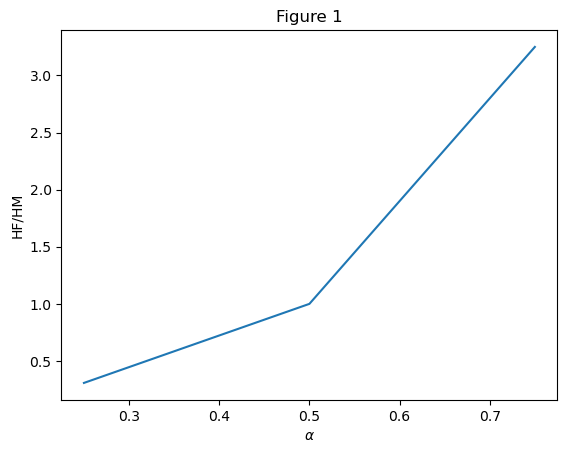

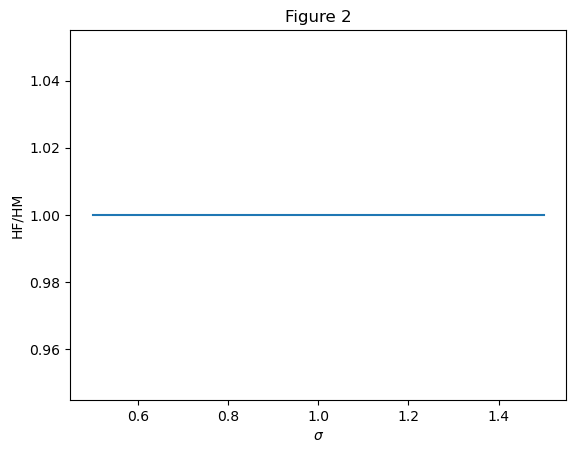

In [2]:
# Parameters 
alphas = np.array([0.25,0.50,0.75])
sigmas = np.array([0.5,1.0,1.5])

# Varying alphas in discrete choice model 
HFHM = []

model.solve_discrete() # calling solver to reset alpha and sigma 

for alpha in alphas:
    model.par.alpha = alpha
    opt = model.solve_discrete()
    HFHM.append(opt.HF/opt.HM)
print(f'For varying alphas: HF/HM = {HFHM}')

# Plotting 
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(alphas, HFHM)
ax.set_title('Figure 1')
ax.set_xlabel('$\\alpha$')
ax.set_ylabel('HF/HM');


# Varying sigmas in discret choice model 
HFHM = [] 

model.__init__() # reset parameters

for sigma in sigmas:
    model.par.sigma = sigma
    opt = model.solve_discrete()
    HFHM.append(opt.HF/opt.HM)
print(f'For varying sigmas: HF/HM = {HFHM}')

# Plotting 
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(sigmas, HFHM)
ax.set_title('Figure 2')
ax.set_xlabel('$\\sigma$')
ax.set_ylabel('HF/HM');


In [3]:

# We can also make a table with all combinations of alpha and sigma by looping
model.__init__() # reset parameters

df = pd.DataFrame(columns= alphas, index= sigmas) #create dataframe

for i in alphas:
    for j in sigmas:
        model.par.alpha = i
        model.par.sigma = j
        opt = model.solve_discrete()
        ratio = opt.HF/opt.HM
        df.loc[j,i] = ratio.round(4)
print('For all combinations of alpha (rows) and sigma (columns):')
display(df)

For all combinations of alpha (rows) and sigma (columns):


,0.25,0.50,0.75
0.5,0.5455,1.0,1.8333
1.0,0.3077,1.0,3.25
1.5,0.2143,1.0,4.6667


## <a id='toc2_'></a>[Question 2](#toc2_)

We solve and plot $\log \frac{H_F}{H_M}$ against $\log \frac{w_F}{w_M}$ for $w_F \in[0.8,0.9,1.0,1.1,1.2]$.

We see that as the relative wage for the female relative to male increases, the females home production relative to the man decareases. This makes sense, at a higher wage for working in the market makes it more attractive to work and increases the opportunity cost of home production.

For varying wF: logWFWM = [0.22314355131420976, 0.0, 0.0, -0.11778303565638351, -0.2231435513142097]
For varying wF: logWFWM = [-0.2231435513142097, -0.10536051565782628, 0.0, 0.09531017980432493, 0.1823215567939546]


Text(0, 0.5, 'log(HF/HM)')

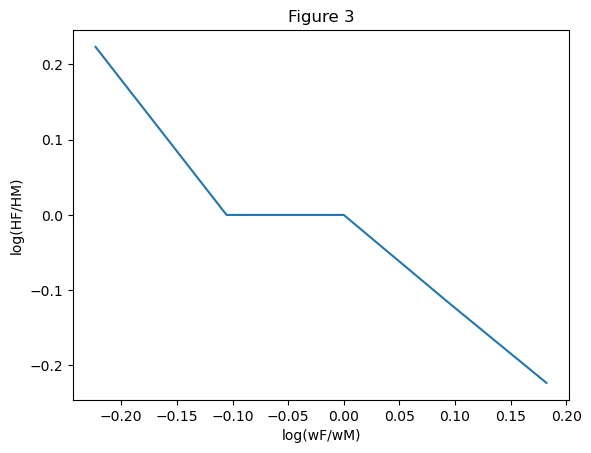

In [4]:
 # reset parameters
model.__init__()

# Logarithmic relative housheold working hours
logHFHM = []
wF_vec = model.par.wF_vec

for wF in wF_vec:
    model.par.wF = wF
    opt = model.solve_discrete()
    logHFHM.append(np.log(opt.HF/opt.HM))
print(f'For varying wF: logWFWM = {logHFHM}')


# Logarithmic relative wages 
logWFWM = []            

for wF in wF_vec:
    model.par.wF = wF
    opt = model.solve_discrete()
    logWFWM.append(np.log(wF/model.par.wM))
print(f'For varying wF: logWFWM = {logWFWM}')

# Plotting relative home working hours against relative wages 
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(logWFWM,logHFHM)

ax.set_title('Figure 3')
ax.set_xlabel('log(wF/wM)')
ax.set_ylabel('log(HF/HM)')


## <a id='toc3_'></a>[Question 3](#toc3_)

We now assume that the choice set is continuous, i.e.
$$
L_M, L_F, H_M, H_F \in[0,24]
$$

Then we solve and plot $\log \frac{H_F}{H_M}$ against $\log \frac{w_F}{w_M}$ for $w_F \in[0.8,0.9,1.0,1.1,1.2]$

We see the same effects as in Q2. When the male and the female are equally productive $\alpha$=0.5 and the substitution is one for one $\sigma=1$, it makes sense to work different hours at home depending on market wages. 

For varying wF: log(HF/HM)=[ 0.22612129  0.10646808  0.         -0.09631556 -0.18393973]
For varying wF: log(wF/wM) = [-0.22314355 -0.10536052  0.          0.09531018  0.18232156]


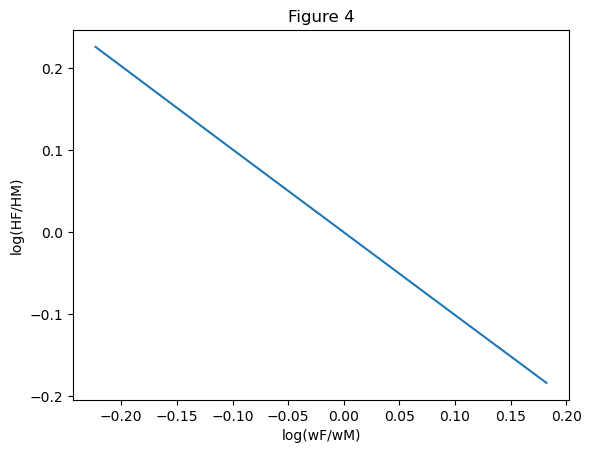

In [5]:

# reset parameters
model.__init__() 

# Solving the continous model 
model.solve_wF_vec()

HFHM = np.log(model.sol.HF_vec/model.sol.HM_vec)
log_wfwm = np.log((wF_vec)/model.par.wM)

print(f'For varying wF: log(HF/HM)={HFHM}')
print(f'For varying wF: log(wF/wM) = {log_wfwm}')

# Plotting 
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(log_wfwm,HFHM)

ax.set_title('Figure 4')
ax.set_xlabel('log(wF/wM)')
ax.set_ylabel('log(HF/HM)');


## <a id='toc4_'></a>[Question 4](#toc4_)

We know consider the following regression suggested by Siminski and Yetsenga (2022):

$$
\log \frac{H_F}{H_M}=\beta_0+\beta_1 \log \frac{w_F}{w_M}
$$

They find that $\beta_0 \approx 0.4$ and $\beta_1 \approx-0.1$. Wet let $\hat{\beta}_0$ and $\hat{\beta}_1$ denote the same coefficients and run the regression on data from the model for fixed $w_M$ and $w_F \in[0.8,0.9,1.0,1.1,1.2]$.

Our estimates for $\beta_0$ and $\beta_1$ are not close to Siminski and Yetsenka but have the same signs at least. Our regression is also based on fewer "observations" compared to Siminski and Yetsenka. A positive $\beta_{0}$ menas that females do the majority of the home production while the negative $\beta_{1}$ indicates that it decreases as the female's wage increase relative to the male's.
 

In [6]:
# Running regression and printing beta0 and beta1 
model.run_regression() 
print(f'beta0 = {model.sol.beta0:.5f}')
print(f'beta1 = {model.sol.beta1:.5f}')

beta0 = 0.00018
beta1 = -1.01127


We now choose $\alpha$ and $\sigma$ such it minimizes $\left(\beta_0-\hat{\beta}_0\right)^2+\left(\beta_1-\hat{\beta}_1\right)^2$. Illustrate how the model fit the data and discuss the economic interpretation of the results.

We find that $\alpha = 0.98968$ and $\sigma = 0.08827$ gives the best fit. This means that in order to fit, we the female has to be much more productive in home production than the man and the elasticity of substitution must be very low. 

In [7]:
#Estimate alpha and sigma 
opt_alpha_sigma = model.estimate()  # calling estimator funciton
opt_alpha = opt_alpha_sigma[0]
opt_sigma = opt_alpha_sigma[1]
(f'Minimization of errors gives: alpha = {opt_alpha:.5f}, sigma = {opt_sigma:.5f}') #printing results

'Minimization of errors gives: alpha = 0.98518, sigma = 0.09544'

In [8]:
# Setting data for 3d plot illustration of minimization of errors  

#%matplotlib inline
#%matplotlib qt
%matplotlib widget
import matplotlib
from matplotlib import pyplot as pyplot

alphas = np.linspace(0.1,0.99,10)
sigmas = np.linspace(0.1,0.99,10)
errors = np.zeros((10,10))

for i, alpha in enumerate(alphas):
    for j, sigma in enumerate(sigmas):
        errors[i,j] = model.est([alpha, sigma])

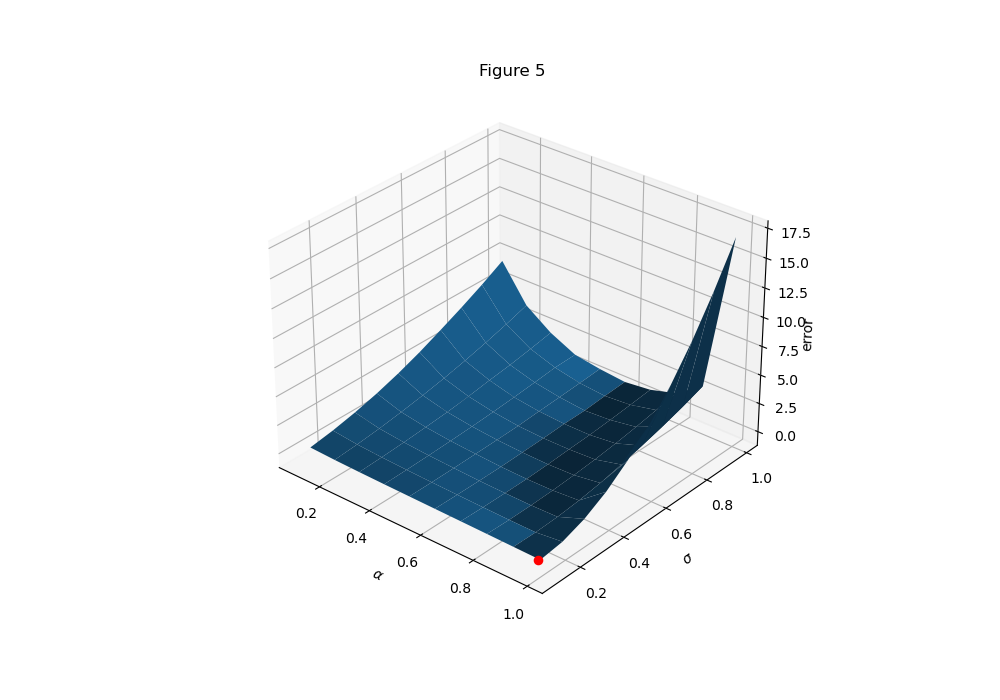

In [9]:
# Plotting minimization 
alphas_mesh, sigmas_mesh = np.meshgrid(alphas,sigmas,indexing='ij')
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_surface(alphas_mesh, sigmas_mesh, errors)

#labels
ax.set_title('Figure 5')
ax.set_xlabel('$\\alpha$', fontsize = 10)
ax.set_ylabel('$\\sigma$', fontsize = 10)
ax.set_zlabel('error', fontsize = 10)
ax.view_init(elev=30, azim = -50)
ax.zaxis.labelpad = -2.0

# Find the minimum point
min_error = np.min(errors) 

# Plot the minimum point in red
ax.scatter(opt_alpha, opt_sigma, min_error, color='red', s=35)



## <a id='toc5_'></a>[Question 5](#toc5_)

As an extension of the model, we suggest changing the utility function such that the male and the female get different different disutility from working. As an example we implement that the man in the couple gets higher disutility from working compared the woman (could as well be the other way around, this i just an exmaple). We assume $\alpha = 0.5$ such that men and women are equally productive in home production. Our utility function is now:


$$
\begin{aligned}
& \max _{L_M, H_M, L_F, H_F} \frac{Q^{1-\rho}}{1-\rho}-\nu\left(\frac{T_M^{1+\frac{1}{\epsilon}}}{1+\frac{1}{\epsilon}}-\right)-\eta\left(\frac{T_F^{1+\frac{1}{\epsilon}}}{1+\frac{1}{\epsilon}}\right), \rho>1, \nu>0, \eta>0, \epsilon>0 \\
\end{aligned}
$$

The baseline parameters are:
1. Preferences: $\rho=2, \nu=0.001, \eta =0.002, \epsilon=1, \omega=0.5$
2. Household production: $\alpha=0.5, \sigma=1$
3. Wages: $w_M=w_F=1$

In [10]:
# import of the model 
import NewHouseholdSpecializationModel as NHSM

#from HouseholdSpecializationModel import HouseholdSpecializationModelClass
model = NHSM.NewHouseholdSpecializationModelClass()

For varying wF: log(HF/HM)=[ 1.72086433e-01  9.45047206e-02  7.27998962e-06 -1.16202183e-01
 -2.10149180e-01]
For varying wF: log(wF/wM) = [-0.22314355 -0.10536052  0.          0.09531018  0.18232156]


Text(0, 0.5, 'log(HF/HM)')

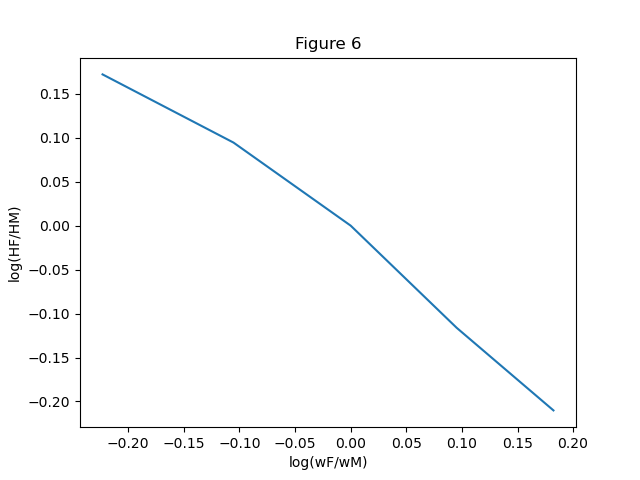

In [11]:
# Solving the continous model 
model.solve_wF_vec()

HFHM = np.log(model.sol.HF_vec/model.sol.HM_vec)
log_wfwm = np.log((wF_vec)/model.par.wM)

print(f'For varying wF: log(HF/HM)={HFHM}')
print(f'For varying wF: log(wF/wM) = {log_wfwm}')

# Plotting 
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(log_wfwm,HFHM)

ax.set_title('Figure 6')
ax.set_xlabel('log(wF/wM)')
ax.set_ylabel('log(HF/HM)')

In [12]:
# Running regression and printing beta0 and beta1 
model.run_regression() 
print(f'beta0 = {model.sol.beta0:.5f}')
print(f'beta1 = {model.sol.beta1:.5f}')

beta0 = -0.02169
beta1 = -0.95768


From the above $\beta_0$ and $\beta_1$ it does not look like the model fit is better. Next we try to optimize $\epsilon$ and $\sigma$ to match the data. 

In [13]:
#Estimate epsilon and sigma 
opt_epsilon_sigma = model.estimate()  # calling estimator function
opt_epsilon = opt_epsilon_sigma[0]
opt_sigma = opt_epsilon_sigma[1]
(f'Minimization of errors gives: epsilon = {opt_alpha:.5f}, sigma = {opt_sigma:.5f}') #printing results

'Minimization of errors gives: epsilon = 0.98518, sigma = 0.10248'

We then implement the new optimized parameters. 

In [14]:
# Implementing optimized parameters
model.par.epsilon = opt_epsilon 
model.par.sigma = opt_sigma

# Solve the model again 
model.solve_wF_vec()

HFHM = np.log(model.sol.HF_vec/model.sol.HM_vec)
log_wfwm = np.log((wF_vec)/model.par.wM)

# Running regression and to check fit of beta0 and beta1 
model.run_regression() 
print(f'beta0 = {model.sol.beta0:.5f}')
print(f'beta1 = {model.sol.beta1:.5f}')


beta0 = 0.00050
beta1 = -0.10252


Now we have a model that matches a little bit better based on a more realistic assumption about $\alpha$. But the model is not perfect and could still be improved. 

# Conclusion

We conclude that we he have not found a model that can make a good fit to real data. 

We have to adjust the utility function or something else in the maximizaiton problem in order to match the data. 

One could for example also consider adjusting the available hours to take sleep into consideration or incluce children. Overall the model is probably too simple to explain reality but we get an insight into underlying effects/structure of time use among couples. 